# PyTorch linear

## 线性回归模型

### 一元线性回归
假设有变量 $x_i$ 和目标 $y_i$，每个 i 对应于一个数据点，建立一个线性模型

$$
\hat{y}_i = w x_i + b
$$

$\hat{y}_i$ 是我们预测的结果，希望通过 $\hat{y}_i$ 来拟合目标 $y_i$，使得误差最小，即最小化

$$
\frac{1}{n} \sum_{i=1}^n(\hat{y}_i - y_i)^2
$$

然后使用梯度下降来最小化这个误差。

### 梯度
梯度在数学上就是导数，如果是一个多元函数，那么梯度就是偏导数。比如一个函数f(x, y)，那么 f 的梯度就是 

$$
(\frac{\partial f}{\partial x},\ \frac{\partial f}{\partial y})
$$

可以称为 grad f(x, y) 或者 $\nabla f(x, y)$。具体某一点 $(x_0,\ y_0)$ 的梯度就是 $\nabla f(x_0,\ y_0)$。

下面这个图片是 $f(x) = x^2$ 这个函数在 x=1 处的梯度

![](https://ws3.sinaimg.cn/large/006tNc79ly1fmarbuh2j3j30ba0b80sy.jpg)

从几何意义来讲，一个点的梯度值是这个函数变化最快的地方，具体来说，对于函数 f(x, y)，在点 $(x_0, y_0)$ 处，沿着梯度 $\nabla f(x_0,\ y_0)$ 的方向，函数增加最快，也就是说沿着梯度的方向，能够更快地找到函数的极大值点。反过来沿着梯度的反方向，能够更快地找到函数的最小值点。

### 梯度下降法


沿着梯度的反方向，我们不断改变 w 和 b 的值，最终找到一组最好的 w 和 b 使得误差最小。

每次往下走的那一步的长度，这个长度称为学习率，用 $\eta$ 表示。
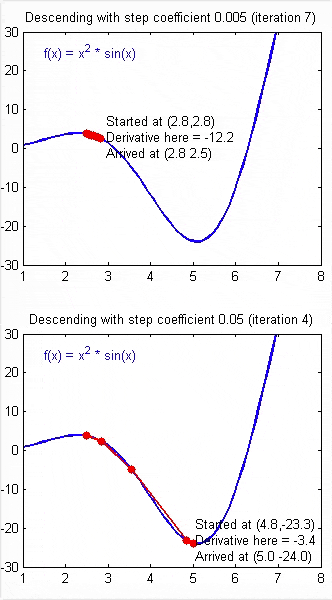

可以看到上面的学习率较为合适，而下面的学习率太大，就会导致不断跳动

最后我们的更新公式就是

$$
w := w - \eta \frac{\partial f(w,\ b)}{\partial w} \\
b := b - \eta \frac{\partial f(w,\ b)}{\partial b}
$$

通过不断地迭代更新，最终我们能够找到一组最优的 w 和 b，这就是梯度下降法的原理。

In [1]:
import torch
import numpy as np
from torch.autograd import Variable

### 数据集

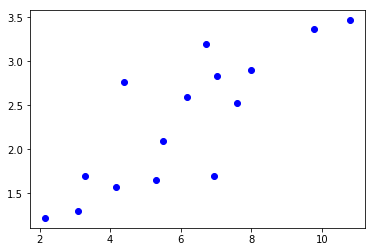

In [2]:
# 读入数据 x 和 y
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# 画出图像
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_train, y_train, 'bo')

### 构建线性回归模型

In [3]:
# 转换成 Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

# 定义参数 w 和 b
w = Variable(torch.randn(1), requires_grad=True) # 随机初始化
b = Variable(torch.zeros(1), requires_grad=True) # 使用 0 进行初始化

# 构建线性回归模型
x_train = Variable(x_train)
y_train = Variable(y_train)

def linear_model(x):
    return x * w + b

### 进行训练

使用均方差作为损失函数

$$
\frac{1}{n} \sum_{i=1}^n(\hat{y}_i - y_i)^2
$$

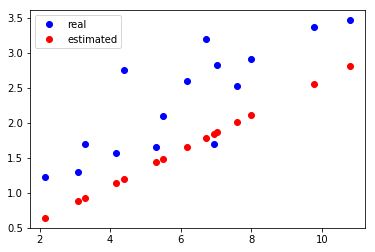

In [4]:
# 训练一次

y_ = linear_model(x_train)

def get_loss(y_, y):
    return torch.mean((y_ - y_train) ** 2)

loss = get_loss(y_, y_train)

# 自动求导
loss.backward()

# 更新一次参数
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

epoch: 0, loss: 0.661442995071
epoch: 1, loss: 0.230548083782
epoch: 2, loss: 0.222304210067
epoch: 3, loss: 0.221883624792
epoch: 4, loss: 0.221609205008
epoch: 5, loss: 0.221338838339
epoch: 6, loss: 0.221069946885
epoch: 7, loss: 0.220802336931
epoch: 8, loss: 0.220536187291
epoch: 9, loss: 0.220271423459


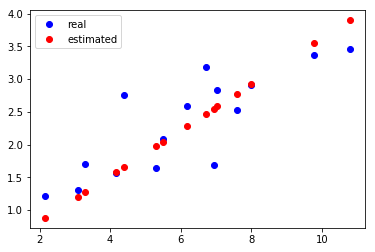

In [5]:
# 训练10次

for e in range(10): # 进行 10 次更新
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度
    loss.backward()
    
    w.data = w.data - 1e-2 * w.grad.data # 更新 w
    b.data = b.data - 1e-2 * b.grad.data # 更新 b 
    print('epoch: {}, loss: {}'.format(e, loss.data[0]))

y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()